# Обучение без учителя: 4 метода кластеризации данных на Python

Описаны четыре популярных метода обучения без учителя для кластеризации данных с соответствующими примерами программного кода на Python.

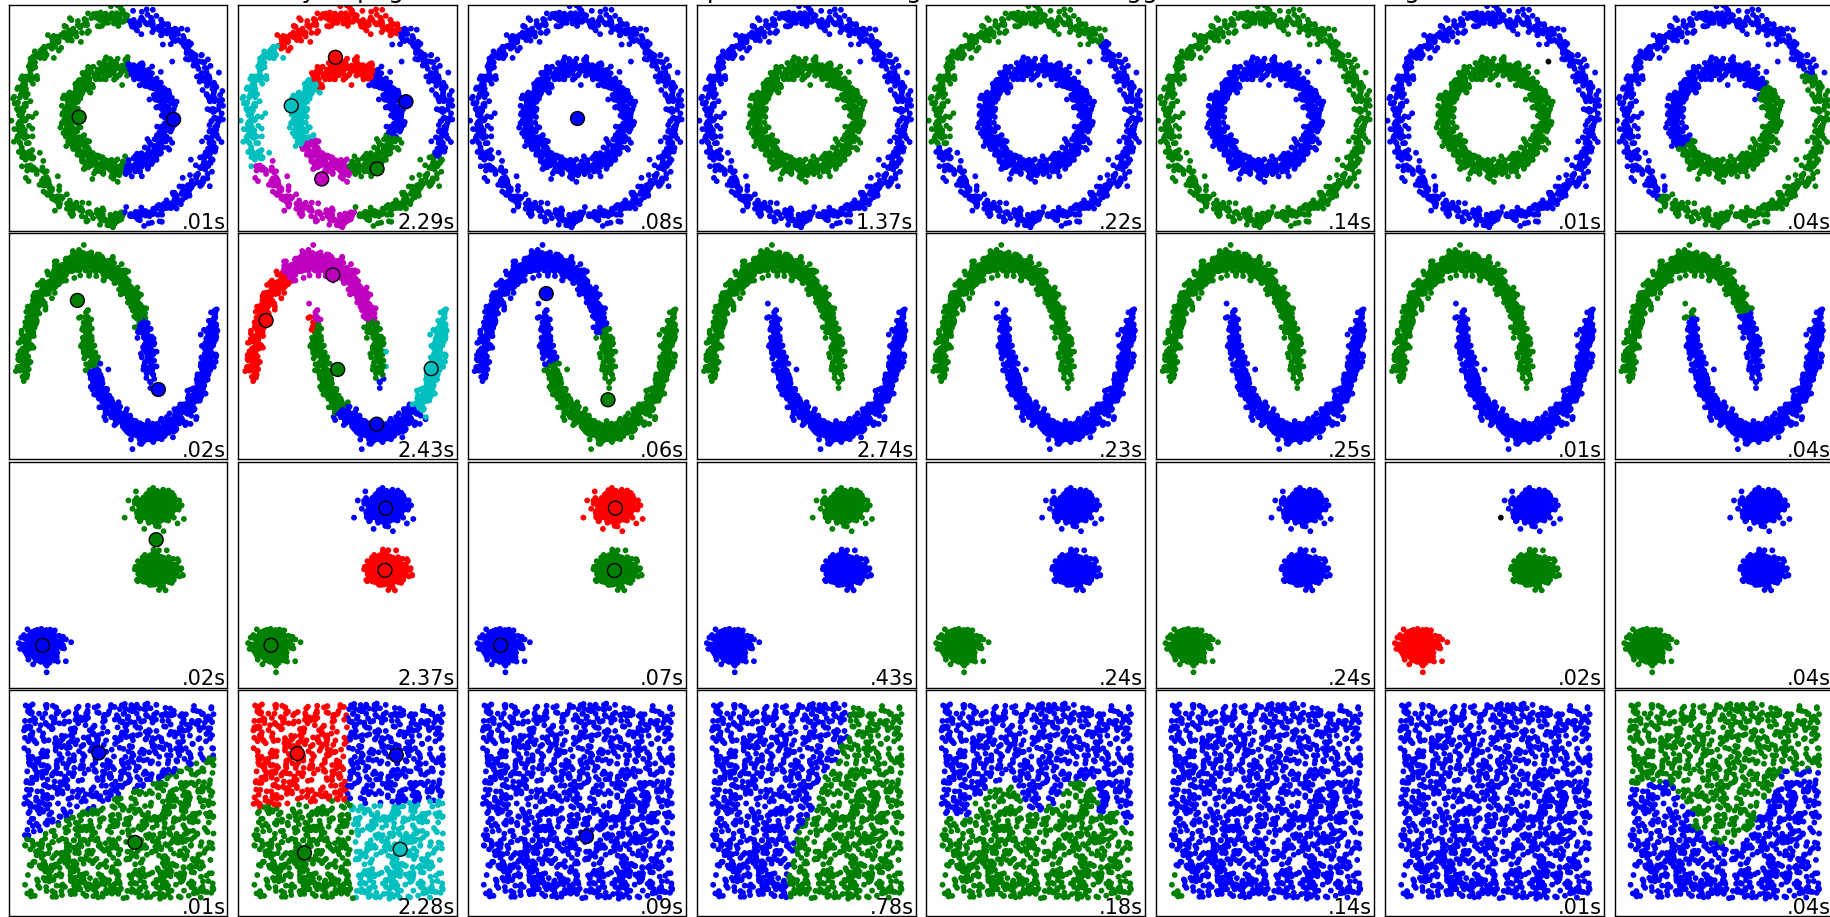

# Обучение без учителя

Обучение без учителя (unsupervised learning, неконтролируемое обучение) – класс методов машинного обучения для поиска шаблонов в наборе данных. Данные, получаемые на вход таких алгоритмов обычно не размечены, то есть передаются только входные переменные X без соответствующих меток y. Если в контролируемом обучении (обучении с учителем, supervised learning) система пытается извлечь уроки из предыдущих примеров, то в обучении без учителя – система старается самостоятельно найти шаблоны непосредственно из приведенного примера.

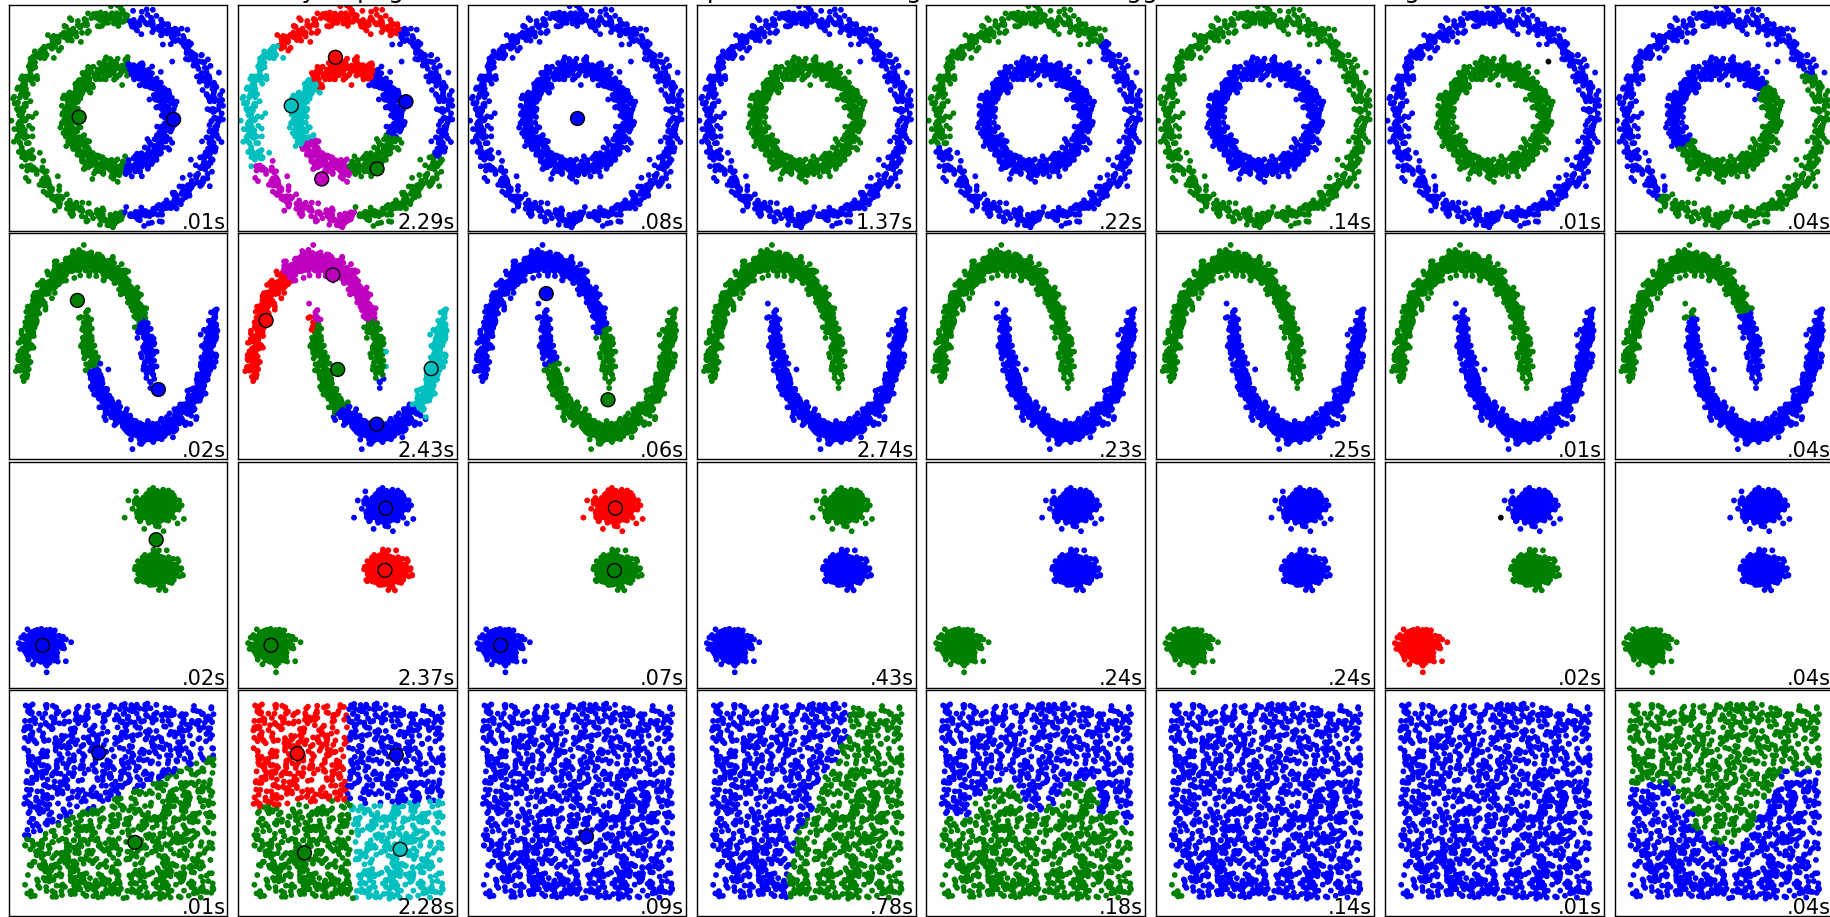

На левой части изображения представлен пример контролируемого обучения: здесь для того, чтобы найти лучшую функцию, соответствующую представленным точкам, используется метод регрессии. В то же время при неконтролируемом обучении входные данные разделяются на основе представленных характеристик, а предсказание свойств основывается на том, какому кластеру принадлежит пример.

Методы кластеризации данных являются одним из наиболее популярных семейств машинного обучения без учителя. Рассмотрим некоторые из них подробнее.

# Важная терминология

+ Feature (Особенности): входная переменная, используемая для создания прогнозов.
+ Predictions (Прогнозы): выходные данные модели при наличии входного примера.
+ Example (Пример): строка набора данных. Пример обычно содержит один или несколько объектов.
+ Label (Метки): результат функции.

# Подготовка выборки для кластеризации данных

Для составления прогнозов воспользуемся классическим [набором данных ирисов Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0). Датасет представляет набор из 150 записей с пятью атрибутами в следующем порядке: длина чашелистика (sepal length), ширина чашелистика (sepal width), длина лепестка (petal length), ширина лепестка (petal width) и класс, соответствующий одному из трех видов: Iris Setosa, Iris Versicolor или Iris Virginica, обозначенных соответственно 0, 1, 2. Наш алгоритм должен принимать четыре свойства одного конкретного цветка и предсказывать, к какому классу (виду ириса) он принадлежит. Имеющиеся в наборе данных метки можно использовать для оценки качества предсказания.

Для решения задач кластеризации данных в этой статье мы используем Python, библиотеку scikit-learn для загрузки и обработки набора данных и matplotlib для визуализации. Ниже представлен программный код для исследования исходного набора данных.

In [1]:
# Импортируем библиотеки
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Загружаем данные
iris_df = datasets.load_iris()

In [3]:
# Методы, доступные для набора данных
print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'target', 'target_names']


In [4]:
# Признаки
print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Метки
print(iris_df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# Имена меток
print(iris_df.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
# Разделение набора данных
x_axis = iris_df.data[:, 0] # Sepal Length
y_axis = iris_df.data[:, 1] # Sepal Width

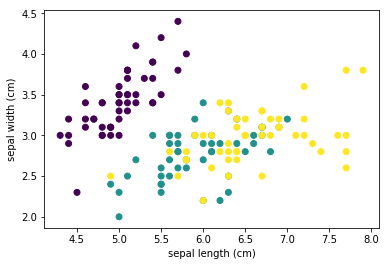

In [8]:
# Построение
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

На диаграмме фиолетовым цветом обозначен вид Setosa, зеленым – Versicolor и желтым – Virginica. При построении были взяты лишь два признака. Вы можете проанализировать как разделяются классы при других комбинациях параметров.

Цель кластеризации данных состоит в том, чтобы выделить группы примеров с похожими чертами и определить соответствие примеров и кластеров. При этом исходно у нас нет примеров такого разбиения. Это аналогично тому, как если бы в приведенном наборе данных у нас не было меток, как на рисунке ниже.

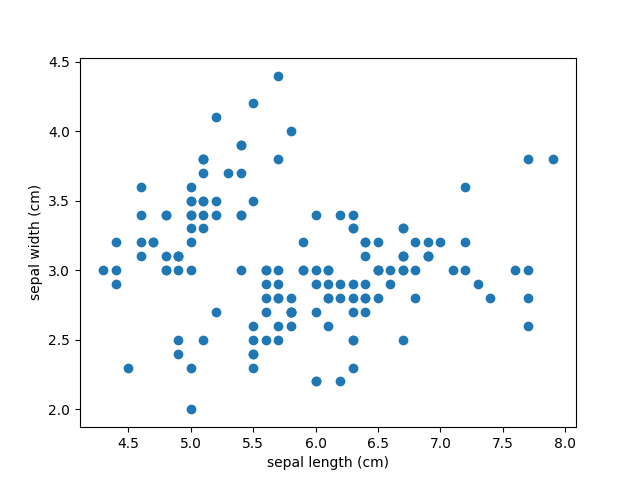

Наша задача – используя все имеющиеся данные, предсказать соответствие объектов выборки их классам, сформировав таким образом кластеры.

# Метод k-средних

Наиболее популярным алгоритмом кластеризации данных является [метод k-средних](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85). Это итеративный алгоритм кластеризации, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

Первоначально выбирается желаемое количество кластеров. Поскольку нам известно, что в нашем наборе данных есть 3 класса, установим параметр модели n_clusters равный трем.

Теперь случайным образом из входных данных выбираются три элемента выборки, в соответствие которым ставятся три кластера, в каждый из которых теперь включено по одной точке, каждая при этом является центроидом этого кластера.

Далее ищем ближайшего соседа текущего центроида. Добавляем точку к соответствующему кластеру и пересчитываем положение центроида с учетом координат новых точек.  Алгоритм заканчивает работу, когда координаты каждого центроида перестают меняться. Центроид каждого кластера в результате представляет собой набор значений признаков, описывающих усредненные параметры выделенных классов.

In [9]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

In [10]:
# Загружаем набор данных
iris_df = datasets.load_iris()

In [11]:
# Описываем модель
model = KMeans(n_clusters=3)

In [12]:
# Проводим моделирование
model.fit(iris_df.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

In [14]:
# Предсказание на всём наборе
all_predictions = model.predict(iris_df.data)

In [15]:
# Выводим предсказания
print(predicted_label)
print(all_predictions)

[0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


При выводе данных нужно понимать, что алгоритм не знает ничего о нумерации классов, и числа 0, 1, 2 – это лишь номера кластеров, определенных в результате работы алгоритма. Так как исходные точки выбираются случайным образом, вывод будет несколько меняться от одного запуска к другому.

Характерной особенностью набора данных ирисов Фишера является то, что один класс (Setosa) легко отделяется от двух остальных. Это заметно и в приведенном примере.

# Иерархическая кластеризация

[Иерархическая кластеризация](https://ru.wikipedia.org/wiki/%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F), как следует из названия, представляет собой алгоритм, который строит иерархию кластеров. Этот алгоритм начинает работу с того, что каждому экземпляру данных сопоставляется свой собственный кластер. Затем два ближайших кластера объединяются в один и так далее, пока не будет образован один общий кластер.

Результат иерархической кластеризации может быть представлен с помощью дендрограммы. Рассмотрим этот тип кластеризации на примере данных для различных видов зерна.

In [16]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Создаём dataFrame
seeds_df = pd.read_csv("http://qps.ru/jNZUT")

In [18]:
# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(seeds_df.pop("grain_variety"))

In [19]:
# Извлекаем измерения как массив NumPy
samples = seeds_df.values

In [20]:
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

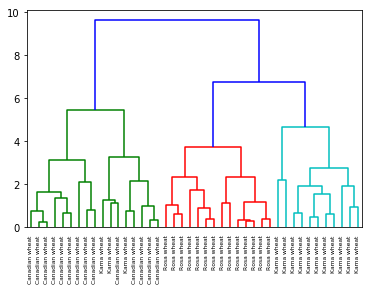

In [21]:
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

Можно видеть, что в результате иерархической кластеризации данных естественным образом произошло разбиение на три кластера, обозначенных на рисунке различным цветом. При этом исходно число кластеров не задавалось.

# Сравнение метода k-средних с иерархической кластеризацией данных

+ Иерархическая кластеризация хуже подходит для кластеризации больших объемов данных в сравнении с методом k-средних. Это объясняется тем, что [временная сложность алгоритма](https://ru.wikipedia.org/wiki/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%BB%D0%BE%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B0) линейна для метода k-средних (O(n)) и квадратична для метода иерархической кластеризации (O(n2))
+ В кластеризации при помощи метода k-средних алгоритм начинает построение с произвольного выбора начальных точек, поэтому, результаты, генерируемые при многократном запуске алгоритма, могут отличаться. В то же время в случае иерархической кластеризации результаты воспроизводимы.
+ Из центроидной геометрии построения метода k-средних следует, что метод хорошо работает, когда форма кластеров является гиперсферической (например, круг в 2D или сфера в 3D).
+ Метод k-средних более чувствителен к зашумленным данным, чем иерархический метод.

# Понижение размерности с методом t-SNE

Метод t-SNE (t-distributed stochastic neighbor embedding) представляет собой один из методов обучения без учителя, используемых для визуализации, например, отображения пространства высокой размерности в двух- или трехмерное пространство. t-SNE расшифровывается как распределенное стохастическое соседнее вложение.

Метод моделирует каждый объект пространства высокой размерности в двух- или трехкоординатную точку таким образом, что близкие по характеристикам элементы данных в многомерном пространстве (например, датасете с большим числом столбцов) проецируются в соседние точки, а разнородные объекты с большей вероятностью моделируются точками, далеко отстоящими друг от друга. Математическое описание работы метода можно найти [здесь](https://habr.com/post/267041/).

Вернемся к примеру с ирисами и посмотрим, как произвести моделирование по этому методу при помощи библиотеки sklearn.

In [22]:
# Импорт библиотек
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [23]:
# Загрузка датасета
iris_df = datasets.load_iris()

In [24]:
# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

In [25]:
# Обучаем модель
transformed = model.fit_transform(iris_df.data)

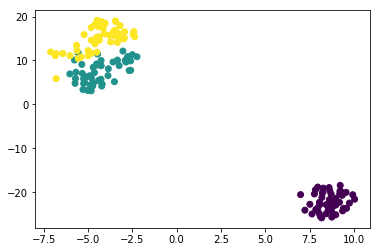

In [26]:
# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

В этом случае каждый экземпляр представлен четырьмя координатами – таким образом, при отображении признаков на плоскость размерность пространства понижается с четырех до двух.

# Метод кластеризации на основе плотности DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise, плотностной алгоритм пространственной кластеризации с присутствием шума) – популярный алгоритм кластеризации, используемый в анализе данных в качестве одной из замен метода k-средних.

Метод не требует предварительных предположений о числе кластеров, но нужно настроить два других параметра: eps и min_samples. Данные параметры – это соответственно максимальное расстояние между соседними точками и минимальное число точек в окрестности (количество соседей), когда можно говорить, что эти экземпляры данных образуют один кластер. В scikit-learn есть соответствующие значения параметров по умолчанию, но, как правило, их приходится настраивать самостоятельно.

In [27]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [28]:
# Загружаем датасет
iris = load_iris()

In [29]:
# Определяем модель
dbscan = DBSCAN()

In [30]:
# Обучаем
dbscan.fit(iris.data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [31]:
# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

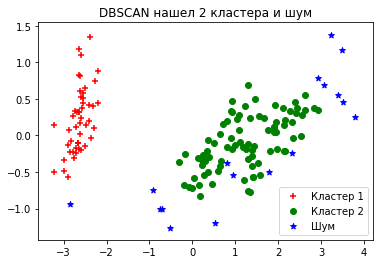

In [32]:
# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

Об устройстве алгоритма простыми словами и о математической подноготной можно прочитать [в этой статье](https://habr.com/post/322034/).